In [ ]:
# from http://localhost:8888/notebooks/data/py4fi/ipython/docker/2016-07-28%20py4fi/2016-07-21.ipynb
# 이것 이외에 웹 페이지로부터 parsing 하는 내용도 거기에 있음
# 또 공시 보고서 처리 관련 이야기도 있음
# h5 handingling도 있고
# txt file handling도 있음

In [ ]:
인터넷 상의 데이터 베이스 자료 입력¶
다음과 같은 인터넷 상의 자료는 pandas_datareader 패키지의 DataReader 을 써서 바로 pandas로 입력 가능

Yahoo! Finance
Google Finance
St.Louis FED (FRED)
Kenneth French’s data library
World Bank
Google Analytics

In [27]:
import pandas_datareader.data as web

In [30]:
import datetime
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2016, 6, 30)

In [67]:
df = web.DataReader("005930.KS", 'yahoo', start, end)
df.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-06-24,1445000.0,1445000.0,1360000.0,1400000.0,411000,1398999.31
2016-06-27,1400000.0,1405000.0,1385000.0,1398000.0,236700,1397000.74
2016-06-28,1390000.0,1404000.0,1379000.0,1399000.0,214300,1398000.02
2016-06-29,1408000.0,1412000.0,1391000.0,1396000.0,210500,1396000.00
2016-06-30,1408000.0,1445000.0,1397000.0,1425000.0,273400,1425000.00


In [68]:
df2 = web.DataReader("^KS200", 'yahoo', start, end)
df2.tail()

RemoteDataError: Unable to read URL: http://ichart.finance.yahoo.com/table.csv

In [5]:
df = web.DataReader("KRX:005930", 'google', start, end)
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2016-06-24,1445000.0,1445000.0,1360000.0,1400000.0,408920
2016-06-27,1400000.0,1405000.0,1385000.0,1398000.0,236573
2016-06-28,1390000.0,1404000.0,1379000.0,1399000.0,213829
2016-06-29,1408000.0,1412000.0,1391000.0,1396000.0,208090
2016-06-30,1408000.0,1445000.0,1397000.0,1425000.0,272883


In [6]:
gdp = web.DataReader("GDP", "fred", start, end)
gdp

,GDP
DATE,
2015-01-01,17783.6
2015-04-01,17998.3
2015-07-01,18141.9
2015-10-01,18222.8
2016-01-01,18281.6
2016-04-01,18437.6


In [33]:
data = web.DataReader("KRX:KOSPI", 'google', start, end)
data.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2016-06-24,2001.55,2001.55,1892.75,1925.24,750546000
2016-06-27,1901.85,1926.87,1900.83,1926.85,394266000
2016-06-28,1907.71,1937.99,1907.49,1936.22,373459000
2016-06-29,1946.31,1966.21,1941.90,1956.36,451186000
2016-06-30,1971.54,1972.81,1959.28,1970.35,349862000


In [36]:
# 이 부분은 원서에 없는 부분입니다.
# VSTOXX 에서 누락된 데이터를 확인해 봅니다.
# 이 부분도 유용할 듯.  inf 도 확인해야 하지 않으려나...

missing = data[data.isnull().any(axis=1)]
print(len(missing))
missing

0


,Open,High,Low,Close,Volume
Date,,,,,


In [37]:
notnull = data[data.notnull().all(axis=1)].tail()
notnull

,Open,High,Low,Close,Volume
Date,,,,,
2016-06-24,2001.55,2001.55,1892.75,1925.24,750546000
2016-06-27,1901.85,1926.87,1900.83,1926.85,394266000
2016-06-28,1907.71,1937.99,1907.49,1936.22,373459000
2016-06-29,1946.31,1966.21,1941.90,1956.36,451186000
2016-06-30,1971.54,1972.81,1959.28,1970.35,349862000


In [38]:
data = data[data.index <= notnull.index[-1]]

In [39]:
data = data.fillna(method='ffill')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 369 entries, 2015-01-02 to 2016-06-30
Data columns (total 5 columns):
Open      369 non-null float64
High      369 non-null float64
Low       369 non-null float64
Close     369 non-null float64
Volume    369 non-null int64
dtypes: float64(4), int64(1)
memory usage: 17.3 KB


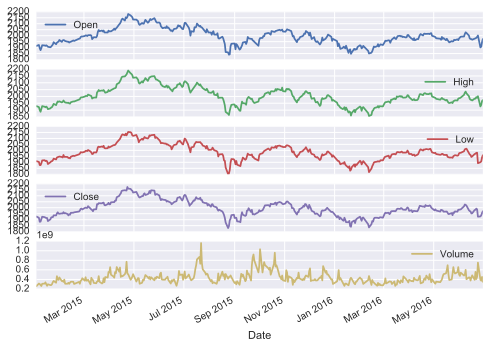

In [40]:
data.plot(subplots=True)
plt.show()

In [41]:
rets = np.log(data / data.shift(1)) 
rets.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,0.004025,-0.003734,-0.003304,-0.005565,0.191655
2015-01-06,-0.013873,-0.011481,-0.013749,-0.017535,-0.031617
2015-01-07,-0.008786,-0.006558,-0.000591,0.000733,-0.079392
2015-01-08,0.008981,0.010346,0.008227,0.010991,-0.067472


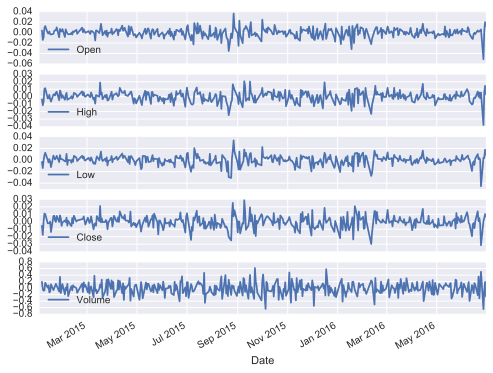

In [42]:
rets.plot(subplots=True, grid=True, style='b', figsize=(8, 6))
plt.show()

In [ ]:
# 아래는 http://localhost:8888/notebooks/data/py4fi/ipython/docker/ipython/2016-08-04%2011_Statistics_b.ipynb 의 내용

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from sklearn.decomposition import KernelPCA

In [5]:
symbols = ['ADS.DE', 'ALV.DE', 'BAS.DE', 'BAYN.DE', 'BEI.DE',
           'BMW.DE', 'CBK.DE', 'CON.DE', 'DAI.DE', 'DB1.DE',
           'DBK.DE', 'DPW.DE', 'DTE.DE', 'EOAN.DE', 'FME.DE',
           'FRE.DE', 'HEI.DE', 'HEN3.DE', 'IFX.DE', 'LHA.DE',
           'LIN.DE', 'LXS.DE', 'MRK.DE', 'MUV2.DE', 'RWE.DE',
           'SAP.DE', 'SDF.DE', 'SIE.DE', 'TKA.DE', 'VOW3.DE',
           '^GDAXI']

In [6]:
import datetime
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2016, 6, 30)

In [7]:
symbols = ['KRX:KOSPI']
           
           
           
###           ###'INDEXDJX:.DJI', 'SHA:000001', 'INDEXNIKKEI:NI225']



###         'USDJPY', 'USDCNY', 'USDKRW', 
###         'NYSEARCA:OIL', 'NYSEARCA:GLD', 'NYSEARCA:JJC', 'NYSEARCA:CORN',
###          'INDEXCBOE:TNX'     


# "^KS200"
symbols2 = ['^DJI']


# http://stackoverflow.com/questions/22991567/pandas-yahoo-finance-datareader  이거 좀 읽어 봐야 할 듯

In [ ]:
%%time
data_v1 = pd.DataFrame()
for sym in symbols2:
    data_v1[sym] = web.DataReader(sym, 'yahoo', start, end)
data_v1 = data_v1.dropna()

In [8]:
%%time
data_v1 = pd.DataFrame()
for sym in symbols2:
    data_v1[[sym]] = web.DataReader(sym, 'yahoo', start, end)
data_v1 = data_v1.dropna()

ValueError: Columns must be same length as key

In [69]:
%%time
data_v1 = pd.DataFrame()
for sym in symbols:
    data_v1[str(sym)] = web.DataReader(sym, 'google', start, end)
data_v1 = data_v1.dropna()

ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series

In [10]:
dax = pd.DataFrame(data.pop('^GDAXI'))

In [11]:
data[data.columns[-10:]].head()

,LIN.DE,LXS.DE,MRK.DE,MUV2.DE,RWE.DE,SAP.DE,SDF.DE,SIE.DE,TKA.DE,VOW3.DE
Date,,,,,,,,,,
2010-01-04,85.00,27.760,65.21,108.30,68.7311,32.940,41.740,63.4424,27.395,64.50
2010-01-05,83.02,28.495,64.73,108.50,68.2926,32.645,44.525,63.4811,27.765,63.25
2010-01-06,84.44,28.350,64.69,107.80,68.1630,33.225,45.020,63.7137,27.630,65.00
2010-01-07,83.92,28.935,66.05,108.05,67.8740,34.105,46.200,64.4696,27.550,65.75
2010-01-08,83.10,28.505,65.38,107.85,67.7743,34.345,46.040,64.8765,28.070,66.46


In [12]:
scale_function = lambda x: (x - x.mean()) / x.std()

In [13]:
data_scaled = data.apply(scale_function)
data_scaled[data_scaled.columns[-10:]].head()

,LIN.DE,LXS.DE,MRK.DE,MUV2.DE,RWE.DE,SAP.DE,SDF.DE,SIE.DE,TKA.DE,VOW3.DE
Date,,,,,,,,,,
2010-01-04,-1.834249,-2.260276,-0.998856,-0.985491,2.665426,-1.744409,0.730588,-1.826992,1.370121,-1.855626
2010-01-05,-1.913171,-2.179470,-1.021533,-0.978634,2.634032,-1.769692,0.986101,-1.823507,1.448019,-1.884795
2010-01-06,-1.856570,-2.195411,-1.023422,-1.002633,2.624753,-1.719982,1.031515,-1.802562,1.419597,-1.843959
2010-01-07,-1.877297,-2.131097,-0.959171,-0.994062,2.604062,-1.644560,1.139776,-1.734494,1.402754,-1.826458
2010-01-08,-1.909982,-2.178371,-0.990824,-1.000919,2.596924,-1.623990,1.125096,-1.697853,1.512233,-1.809890


In [14]:
import zipline
import pytz
import datetime as dt

In [15]:
data = zipline.data.load_from_yahoo(stocks=['GLD', 'GDX'], 
         end=dt.datetime(2014, 3, 15, 0, 0, 0, 0, pytz.utc)).dropna()
data.tail()

,GDX,GLD
Date,,
2014-03-10 00:00:00+00:00,25.580999,129.130005
2014-03-11 00:00:00+00:00,25.738602,129.860001
2014-03-12 00:00:00+00:00,26.516770,131.759995
2014-03-13 00:00:00+00:00,27.216134,132.210007
2014-03-14 00:00:00+00:00,27.314637,133.100006


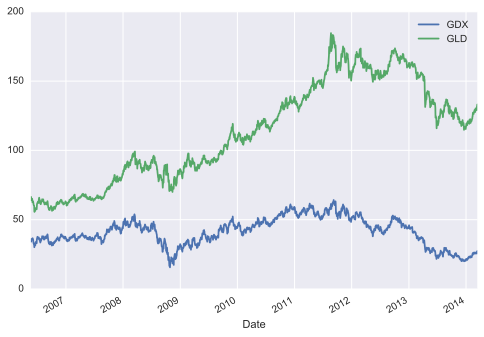

In [16]:
len(data)
data.plot()
plt.show()

In [17]:
import matplotlib as mpl
mpl_dates = mpl.dates.date2num(data.index.to_pydatetime())
mpl_dates

array([ 732453.,  732454.,  732455., ...,  735304.,  735305.,  735306.])

In [ ]:
# http://localhost:8888/notebooks/data/py4fi/ipython/docker/ipython/2016-07-28.ipynb 여기 내용
# 이 외에도 포트폴리오 최적화 내용이 있음

In [18]:
import pandas_datareader.data as wb

symbols = ['AAPL', 'MSFT', 'YHOO', 'DB', 'GLD']
noa = len(symbols)
data = pd.DataFrame()
for sym in symbols:
    data[sym] = wb.DataReader(sym, data_source='yahoo',
                              end='2014-09-12')['Adj Close']
data.columns = symbols
data.tail()

,AAPL,MSFT,YHOO,DB,GLD
Date,,,,,
2014-09-08,94.682426,44.324409,41.810001,34.039067,120.730003
2014-09-09,94.326258,44.601017,40.779999,33.834365,120.870003
2014-09-10,97.223719,44.677325,41.139999,34.399735,120.260002
2014-09-11,97.637642,44.829937,41.259998,34.360744,119.470001
2014-09-12,97.859046,44.543790,42.880001,34.146292,118.379997


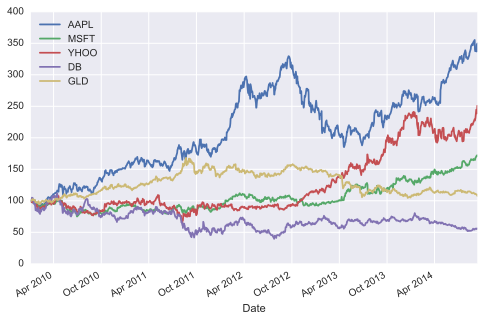

In [19]:
(data / data.ix[0] * 100).plot(figsize=(8, 5), grid=True)
plt.show()

In [20]:
rets = np.log(data / data.shift(1))
rets.mean() * 252

AAPL    0.267080
MSFT    0.114505
YHOO    0.196165
DB     -0.125174
GLD     0.016054
dtype: float64

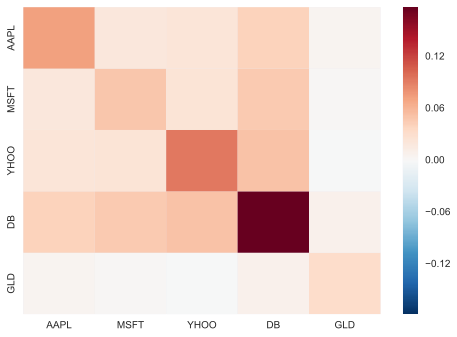

In [21]:
sns.heatmap(rets.cov() * 252)
plt.show()

In [22]:
np.random.seed(2)
weights = np.random.random(noa)
weights /= np.sum(weights)
weights

array([ 0.23349275,  0.01388454,  0.2943663 ,  0.2331326 ,  0.22512381])

In [23]:
prets = []
pvols = []
for p in range (2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(np.sum(rets.mean() * weights) * 252)
    pvols.append(np.sqrt(np.dot(weights.T, 
                        np.dot(rets.cov() * 252, weights))))
prets = np.array(prets)
pvols = np.array(pvols)

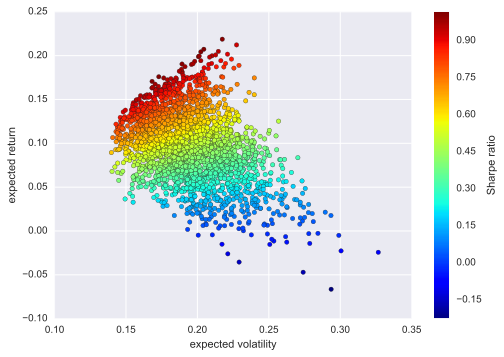

In [24]:
plt.scatter(pvols, prets, c=prets/pvols, marker='o', cmap=mpl.cm.jet)
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
plt.show()

In [ ]:
# https://github.com/dylanthomas/research_public/blob/master/lectures/Fundamental%20Factor%20Models.ipynb
# 이건 보니 개별 주식의 정보를 모닝스타로부터 받아 와서 fundamental analysis 하는 내용인 듯.  일단 pass.
# 자세한 내용은 https://www.quantopian.com/help#pipeline-title

In [25]:
import numpy as np
import pandas as pd
from quantopian.pipeline.data import morningstar
import statsmodels.api as sm
from statsmodels import regression
import matplotlib.pyplot as plt
import scipy.stats

ImportError: No module named quantopian.pipeline.data